In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.datasets import load_boston
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

%matplotlib inline

In [2]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
target = pd.DataFrame(data=boston['target'], columns=['medv'])
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
carseats = pd.read_csv('data/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
# Method 1: Create Linear Regression by sklearn.linear_model
LSTAT = np.array(df['LSTAT']).reshape(-1,1)
medv = np.array(df['medv']).reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(LSTAT, medv)
print('Regression line: \t \t  medv = %.4f + %.4f * LSTAT ' %(regr.intercept_,regr.coef_))
# But can not find p value or t-statistic

Regression line: 	 	  medv = 34.5538 + -0.9500 * LSTAT 


In [6]:
# Method 2: Using Scipy
stats.linregress(df['LSTAT'], df['medv'])

LinregressResult(slope=-0.9500493537579909, intercept=34.55384087938311, rvalue=-0.7376627261740147, pvalue=5.081103394388519e-88, stderr=0.03873341621263944)

In [7]:
# Method 3: Using Statsmodels
X = df['LSTAT']
X = sm.add_constant(X)
Y = df['medv']

lm = sm.OLS(Y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           5.08e-88
Time:                        22:45:22   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [8]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

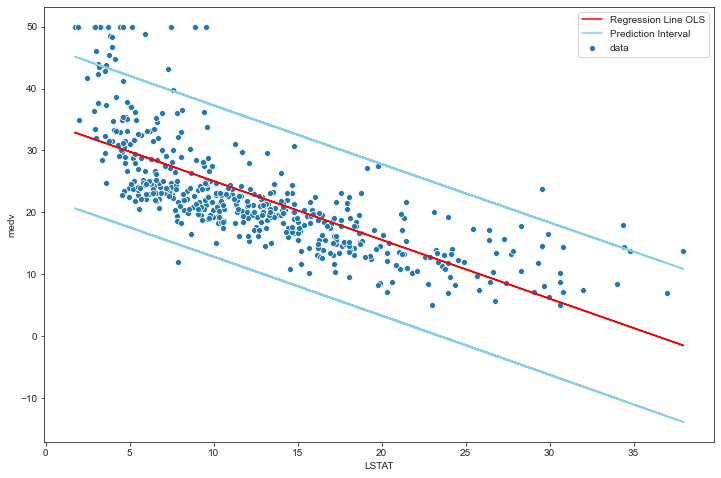

In [9]:
# Visualize
sb.set_style('ticks')
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='LSTAT', y='medv', label='data')
plt.plot(LSTAT, lm.fittedvalues, label='Regression Line OLS', color='red')
plt.plot(LSTAT, iv_l, color='skyblue', label='Prediction Interval')
plt.plot(LSTAT, iv_u, color='skyblue')
plt.legend()
plt.show()

In [10]:
# Diagnostic Plot for Linear Model
from statsmodels.stats.outliers_influence import summary_table
simpleTable, data, column_names = summary_table(lm, alpha=0.05)
studentized_residuals = data[:,10]
fitted_values = lm.fittedvalues.values
residuals = lm.resid.values

from statsmodels.stats.outliers_influence import OLSInfluence
leverage = OLSInfluence(lm).influence

color2 = np.where(studentized_residuals > 3, 'red', 'blue')
color3 = np.where(leverage > 0.395, 'red', 'blue')
color1 = np.where((leverage > 0.395) | (studentized_residuals > 3), 'red', 'blue')

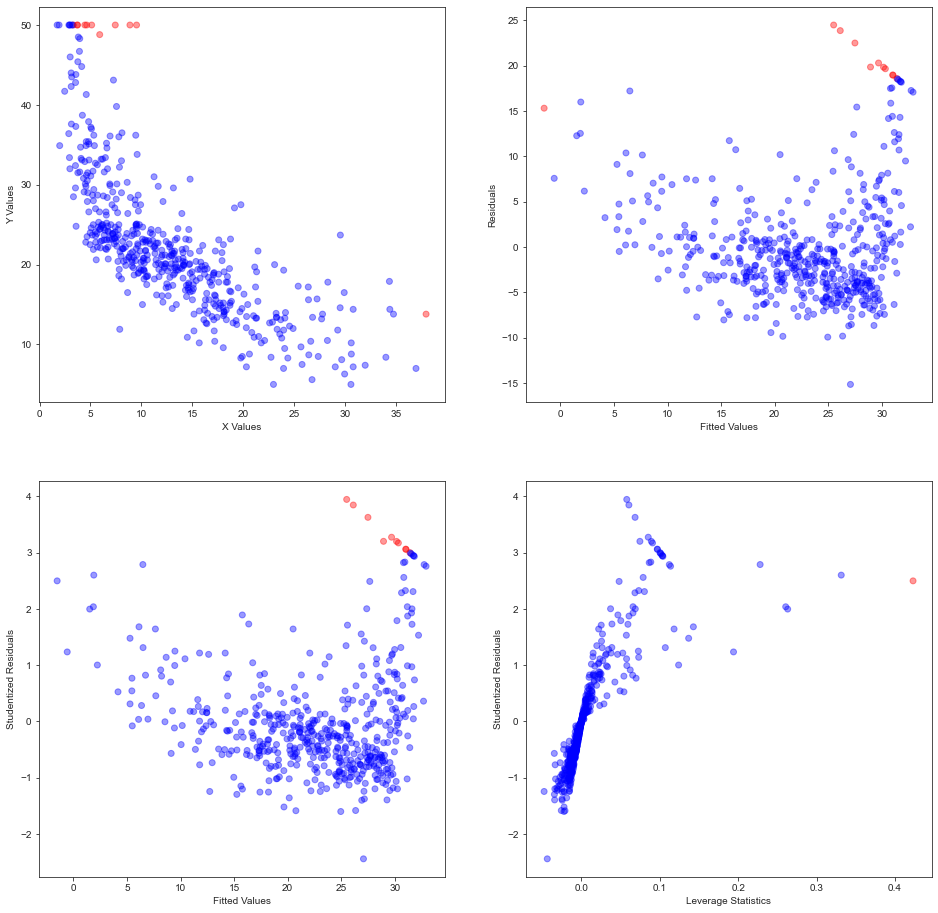

In [11]:
fig, axs = plt.subplots(2,2, figsize=(16,16))

axs[0,0].scatter(x=df['LSTAT'], y=df['medv'], c=color1, alpha=0.4)
axs[0,0].set_xlabel('X Values')
axs[0,0].set_ylabel('Y Values')

axs[0,1].scatter(x=fitted_values, y=residuals, c=color1, alpha=0.4)
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')

axs[1,0].scatter(x=fitted_values, y=studentized_residuals, c=color2, alpha=0.4)
axs[1,0].set_xlabel('Fitted Values')
axs[1,0].set_ylabel('Studentized Residuals')

axs[1,1].scatter(x=leverage, y=studentized_residuals, c=color3, alpha=0.4)
axs[1,1].set_xlabel('Leverage Statistics')
axs[1,1].set_ylabel('Studentized Residuals')
plt.show()

# Middle: Student Residuals > 3 is Outliers
# Right: Leverage Statistics > (p+1)/n = 0.395 is High Leverage

In [12]:
#  Multiple Linear Regression
X = df[['LSTAT', 'AGE']]
X = sm.add_constant(X)
Y = df['medv']
mutil_lm = sm.OLS(Y,X).fit()
print(mutil_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.98e-88
Time:                        22:45:23   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [30]:
# Use formula like R
mutil_lm_2 = smf.ols(formula='medv ~ LSTAT + AGE', data=df).fit()
print(mutil_lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.98e-88
Time:                        22:49:39   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

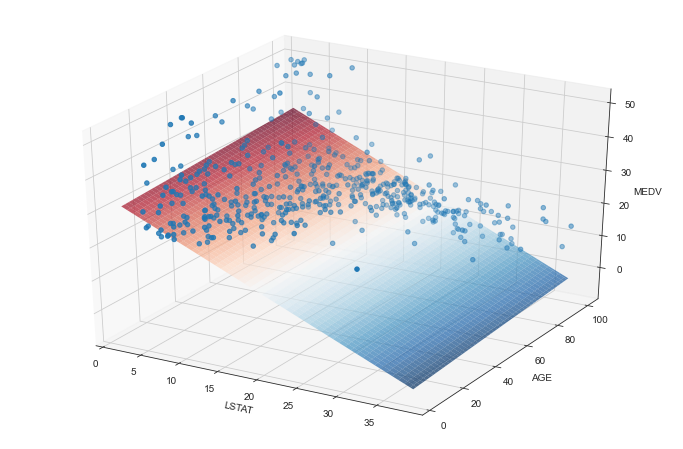

In [13]:
# Visualize Multiple Regression
sb.set_style('ticks')
plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d')
# Make Scatter plot for observation
ax.scatter(X['LSTAT'], X['AGE'], Y, depthshade=True)
ax.set_xlabel('LSTAT')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
# Make Mutil Regression panel
xx1, xx2 = np.meshgrid(np.linspace(X['LSTAT'].min(), X['LSTAT'].max(), 100), 
                        np.linspace(X['AGE'].min(), X['AGE'].max(), 100))
Z = mutil_lm.params[0] + mutil_lm.params[1] * xx1 + mutil_lm.params[2] * xx2
ax.plot_surface(xx1, xx2, Z, linewidth=0, alpha=0.7, cmap=plt.cm.RdBu_r)
plt.show()

In [14]:
#  Multiple Linear Regression with all predictors
X = df.iloc[:,0:-1]
X = sm.add_constant(X)
Y = df['medv']
mutil_lm_all = sm.OLS(Y, X).fit()
print(mutil_lm_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          6.72e-135
Time:                        22:45:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [15]:
# Compute Variance Inflation Factors to identify collinearity problem
from statsmodels.stats.outliers_influence import variance_inflation_factor
print('Variance Inflation Factors')
for i in range(X.shape[1]):
    print('{:10}'.format(X.columns[i]), '{:.3f}'.format(variance_inflation_factor(X.values,i)))
# VIF exceeds 5 indicate a problematic amount of collinearity
# RAD, TAX have collinearily

Variance Inflation Factors
const      585.265
CRIM       1.792
ZN         2.299
INDUS      3.992
CHAS       1.074
NOX        4.394
RM         1.934
AGE        3.101
DIS        3.956
RAD        7.484
TAX        9.009
PTRATIO    1.799
B          1.349
LSTAT      2.941


In [16]:
# Make Interaction
model = smf.ols(formula='medv ~ LSTAT + AGE + LSTAT*AGE', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           4.86e-88
Time:                        22:45:25   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [42]:
model2 = smf.ols(formula='medv ~ LSTAT:AGE', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     412.4
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.92e-67
Time:                        22:56:13   Log-Likelihood:                -1689.0
No. Observations:                 506   AIC:                             3382.
Df Residuals:                     504   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1589      0.483     62.463      0.0

In [17]:
# Make Quadratic non-linear model
model_quadratic_2  = smf.ols(formula='medv ~ LSTAT + I(LSTAT**2)', data=df).fit()
print(model_quadratic_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          1.56e-112
Time:                        22:45:25   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [18]:
model_quadratic_3  = smf.ols(formula='medv ~ LSTAT + I(LSTAT**2) + I(LSTAT**3)', data=df).fit()
print(model_quadratic_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          1.78e-116
Time:                        22:45:25   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6496      1.435     33.909

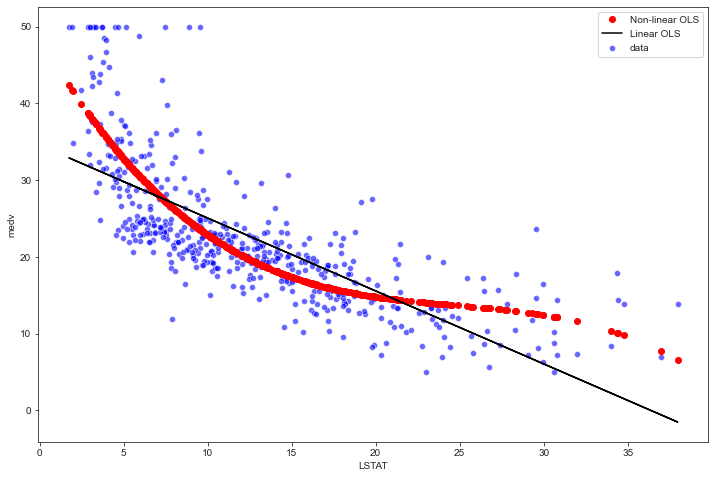

In [19]:
# Visualize non-linear model
sb.set_style('ticks')
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='LSTAT', y='medv', label='data', alpha=0.6, color='blue')
plt.plot(LSTAT, model_quadratic_3.fittedvalues, label='Non-linear OLS', color='red', marker='o', linestyle='none')
# plt.plot(LSTAT, model.fittedvalues, label='Non-linear OLS', color='orange', marker='o', linestyle='none')
plt.plot(LSTAT, lm.fittedvalues, label='Linear OLS', color='k')
plt.legend()
plt.show()

In [20]:
# ANOVA test for equal mean between 2 method
from statsmodels.stats.api import anova_lm

anova_table = anova_lm(lm, model_quadratic_2)
print(anova_table)
#  F-statistic is 135, p-value nearly 0, indicate that much difference between 2 method

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


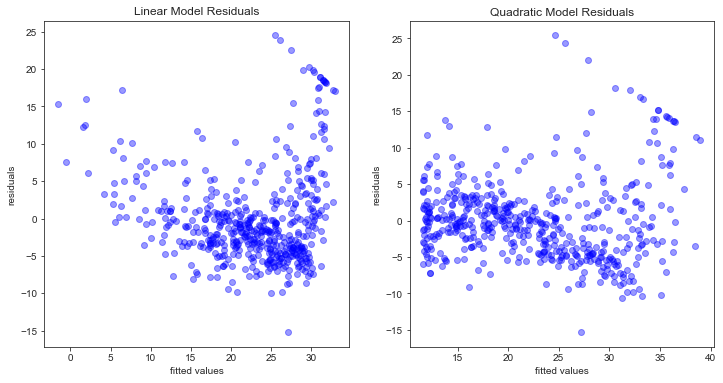

In [21]:
# Plot Residuals between 2 model linear and quadratic

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.scatter(lm.fittedvalues, lm.resid, color='blue', alpha=0.4)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.set_title('Linear Model Residuals')

ax2.scatter(model_quadratic_2.fittedvalues, model_quadratic_2.resid, color='blue', alpha=0.4)
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')
ax2.set_title('Quadratic Model Residuals')

plt.show()

In [22]:
# Try higher order polynominal fits by 2 way:
# Method 1: Use like R, 'forlmula'
formula = 'medv ~ 1 + ' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(1,6))
print(formula)

medv ~ 1 + I(LSTAT**1) + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)


In [23]:
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          8.73e-122
Time:                        22:45:26   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783

In [24]:
# Method 2: use PolynominalFeatures in sklearn
from sklearn.preprocessing import PolynomialFeatures

X5 = PolynomialFeatures(5).fit_transform(df['LSTAT'].values.reshape(-1,1))
y = df['medv'].values.reshape(-1,1)
model_5 = sm.OLS(y, X5).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          8.73e-122
Time:                        22:45:26   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6997      3.604     18.783      0.0

In [25]:
# Both method have same results

In [26]:
# Qualitative Predictors
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
ind_predictors = carseats.columns.to_list()[1:]
formula_2 = 'Sales ~ 1 + ' + ' + '.join(ind_predictors + ['Income:Advertising'] + ['Price:Age'])
print(formula_2)

Sales ~ 1 + CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age


In [28]:
model_qualitative = smf.ols(formula=formula_2, data=carseats).fit()
print(model_qualitative.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          6.14e-166
Time:                        22:45:26   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    